Comparative Analysis

In [2]:
import pandas as pd

# Load the dataset
file_path = "/content/clustered_data.csv"
df = pd.read_csv(file_path)

# Display basic info and first few rows
df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   1000 non-null   int64  
 1   Gender                1000 non-null   int64  
 2   Education Level       1000 non-null   int64  
 3   Employment Status     1000 non-null   int64  
 4   Timely Payment score  1000 non-null   int64  
 5   Lend/Borrow Ratio     1000 non-null   float64
 6   Cluster               1000 non-null   int64  
 7   Credit Score          1000 non-null   int64  
dtypes: float64(1), int64(7)
memory usage: 62.6 KB


(None,
    Age  Gender  Education Level  Employment Status  Timely Payment score  \
 0   60       1                0                  0                    94   
 1   25       1                1                  2                    49   
 2   30       0                0                  0                    87   
 3   58       0                2                  2                    64   
 4   32       1                3                  1                    67   
 
    Lend/Borrow Ratio  Cluster  Credit Score  
 0           1.593074        1           740  
 1           1.502317        3           680  
 2           3.716216        0           800  
 3           1.482203        4           550  
 4           1.584235        3           680  )

In [3]:
pip install pandas numpy scikit-learn matplotlib seaborn

<ipython-input-8-6e2bfa5863f8>:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y=results_df[metric], ax=axes[i], palette="viridis")
<ipython-input-8-6e2bfa5863f8>:61: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(results_df.index, rotation=30)
<ipython-input-8-6e2bfa5863f8>:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y=results_df[metric], ax=axes[i], palette="viridis")
<ipython-input-8-6e2bfa5863f8>:61: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[

<Figure size 1200x500 with 0 Axes>

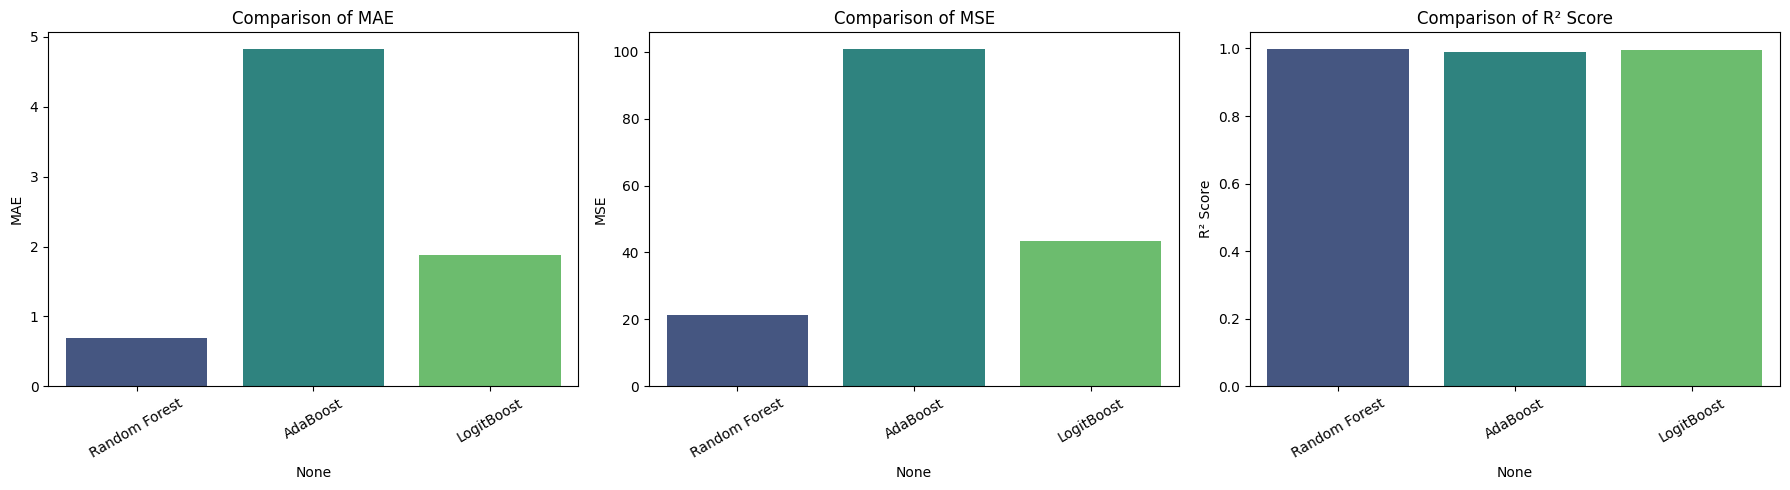

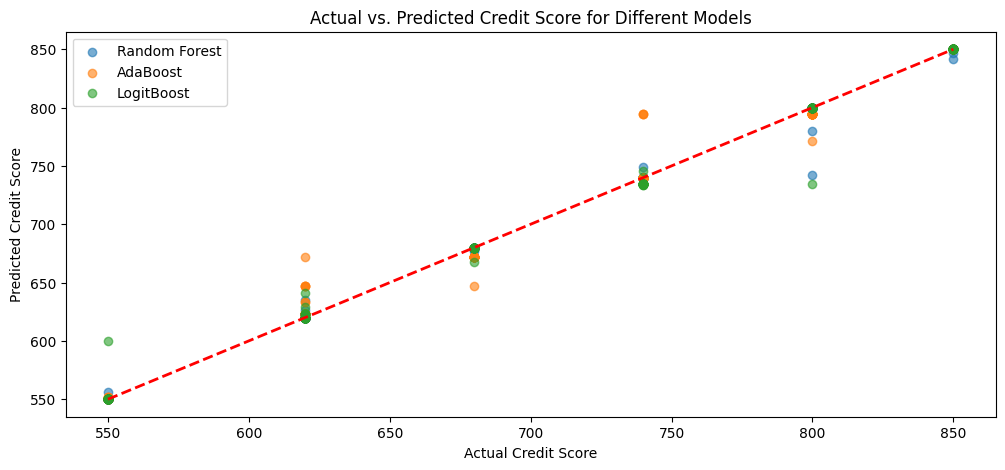

                    MAE         MSE  R² Score
Random Forest  0.686500   21.339150  0.997844
AdaBoost       4.824569  100.777694  0.989819
LogitBoost     1.879619   43.522676  0.995603


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load dataset
df = pd.read_csv("clustered_data.csv")  # Ensure the correct file path

# Define features and target
X = df.drop(columns=["Credit Score"])
y = df["Credit Score"]

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "AdaBoost": AdaBoostRegressor(n_estimators=100, random_state=42),
    "LogitBoost": GradientBoostingRegressor(loss="absolute_error", n_estimators=100, random_state=42),
}

# Train and evaluate models
results = {}
predictions = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    predictions[name] = y_pred

    # Compute evaluation metrics
    results[name] = {
        "MAE": mean_absolute_error(y_test, y_pred),
        "MSE": mean_squared_error(y_test, y_pred),
        "R² Score": r2_score(y_test, y_pred)
    }

# Convert results to DataFrame
results_df = pd.DataFrame(results).T

# Visualization
plt.figure(figsize=(12, 5))

# Bar Plot for MAE, MSE, and R² Score
metrics = ["MAE", "MSE", "R² Score"]
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for i, metric in enumerate(metrics):
    sns.barplot(x=results_df.index, y=results_df[metric], ax=axes[i], palette="viridis")
    axes[i].set_title(f"Comparison of {metric}")
    axes[i].set_ylabel(metric)
    axes[i].set_xticklabels(results_df.index, rotation=30)

plt.tight_layout()
plt.show()

# Scatter Plot for Actual vs. Predicted Credit Scores
plt.figure(figsize=(12, 5))
for name, y_pred in predictions.items():
    plt.scatter(y_test, y_pred, label=name, alpha=0.6)

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--", lw=2)  # Perfect fit line
plt.xlabel("Actual Credit Score")
plt.ylabel("Predicted Credit Score")
plt.title("Actual vs. Predicted Credit Score for Different Models")
plt.legend()
plt.show()

# Print results
print(results_df)

In [9]:
import joblib

# Save the trained Random Forest model
joblib.dump(models["Random Forest"], "random_forest_credit_score_model.pkl")


['random_forest_credit_score_model.pkl']